In [129]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\jv028u\OneDrive - Linde Group\Desktop\stats and ML\Projects'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\jv028u\OneDrive - Linde Group\Desktop\stats and ML\Projects\CNN prac-Image classification.ipynb
C:\Users\jv028u\OneDrive - Linde Group\Desktop\stats and ML\Projects\Google_Stock_Price_Test.csv
C:\Users\jv028u\OneDrive - Linde Group\Desktop\stats and ML\Projects\Google_Stock_Price_Train.csv
C:\Users\jv028u\OneDrive - Linde Group\Desktop\stats and ML\Projects\Untitled.ipynb
C:\Users\jv028u\OneDrive - Linde Group\Desktop\stats and ML\Projects\Untitled1.ipynb
C:\Users\jv028u\OneDrive - Linde Group\Desktop\stats and ML\Projects\.ipynb_checkpoints\CNN prac-Image classification-checkpoint.ipynb
C:\Users\jv028u\OneDrive - Linde Group\Desktop\stats and ML\Projects\.ipynb_checkpoints\shakespeare_rnn-checkpoint.ipynb
C:\Users\jv028u\OneDrive - Linde Group\Desktop\stats and ML\Projects\.ipynb_checkpoints\Untitled-checkpoint.ipynb
C:\Users\jv028u\OneDrive - Linde Group\Desktop\stats and ML\Projects\.ipynb_checkpoints\Untitled1-checkpoint.ipynb


In [131]:
data = pd.read_csv(r'C:\Users\jv028u\OneDrive - Linde Group\Desktop\stats and ML\Projects\Google_Stock_Price_Train.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [132]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [133]:
data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [134]:
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [135]:
data=data.drop('Date',axis=1)
data=data.drop('Volume',axis=1)
data=data.drop('Close',axis=1)

In [136]:
data['Open']=data['Open'].astype(float)
data['High']=data['High'].astype(float)
data['Low']=data['Low'].astype(float)
# data['Volume']=data['Volume'].astype(float)
# data['Close']=data['Close'].astype(float)

In [137]:
data

,Open,High,Low
0,325.25,332.83,324.97
1,331.27,333.87,329.08
2,329.83,330.75,326.89
3,328.34,328.77,323.68
4,322.04,322.29,309.46
...,...,...,...
1253,790.90,792.74,787.28
1254,790.68,797.86,787.66
1255,793.70,794.23,783.20
1256,783.33,785.93,778.92


In [138]:
data.corr()

,Open,High,Low
Open,1.000000,0.999692,0.999498
High,0.999692,1.000000,0.999480
Low,0.999498,0.999480,1.000000


In [139]:
dataset=data.loc[:,["Open"]].values

In [140]:
dataset

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [141]:
train = dataset[:len(dataset) - 50]
test = dataset[len(train):]


In [142]:
train.shape

(1208, 1)

In [143]:
train.reshape(train.shape[0],1)
train.shape

(1208, 1)

In [144]:
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [779.8 ],
       [787.85],
       [798.24]])

normalize the train dataset.(between zero to one)

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scaler=scaler.fit_transform(train)
print(train_scaler)


[[0.08886192]
 [0.10045847]
 [0.09768454]
 ...
 [0.96447835]
 [0.97998536]
 [1.        ]]


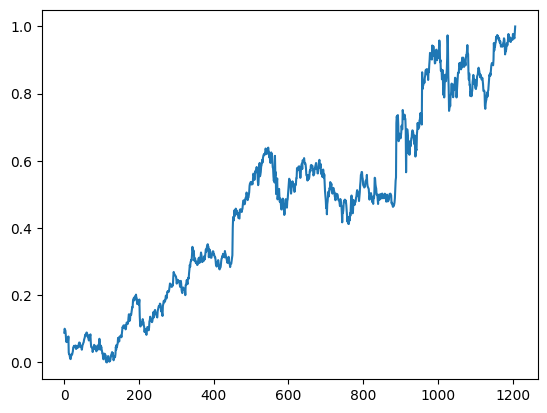

In [146]:
plt.plot(train_scaler)
plt.show()

In [123]:
len(train_scaler)

1208

In [150]:
train_scaler[i-timesteps:i,0]

array([0.96698259, 0.97208738, 0.9744953 , 0.96775312, 0.97208738,
       0.96544152, 0.95970103, 0.96488288, 0.95523193, 0.95189937,
       0.95615657, 0.94671752, 0.93982124, 0.94367391, 0.94317306,
       0.9443096 , 0.9398405 , 0.94415549, 0.95139852, 0.95224611,
       0.96486362, 0.96214748, 0.94579288, 0.91695562, 0.93496687,
       0.92558561, 0.93190399, 0.94511866, 0.95026198, 0.94367391,
       0.9507243 , 0.96486362, 0.97755818, 0.97014178, 0.9561951 ,
       0.96072199, 0.96763754, 0.95779396, 0.95378718, 0.95721606,
       0.96353444, 0.96293728, 0.96420866, 0.9604523 , 0.97769302,
       0.97210664, 0.96721375, 0.96804207, 0.96447835, 0.97998536])

In [184]:
X_train = []
Y_train = []
timesteps = 50

for i in range(timesteps, len(train_scaler)):
    X_train.append(train_scaler[i - timesteps:i, 0])
    Y_train.append(train_scaler[i,0])
    


In [187]:
X_train, Y_train = np.array(X_train), np.array(Y_train)



In [188]:
X_train.shape

(1158, 50)

In [189]:
# reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [190]:
X_train.shape

(1158, 50, 1)

In [192]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Dropout

In [197]:
regressor = Sequential()
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [198]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

In [199]:
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4979
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3378
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2257
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.1737
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.1324
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.1142
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.1073
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0858
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0669
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0689
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0444
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0442
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0398
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0342
Epoch 15/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - lo

In [208]:
inputs = dataset[len(dataset) - len(test) - timesteps:]

In [210]:
# inputs

In [211]:
inputs = scaler.transform(inputs)

In [203]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i - timesteps:i, 0])
    
X_test_rnn = np.array(X_test)
X_test_rnn = np.reshape(X_test_rnn, (X_test_rnn.shape[0], X_test_rnn.shape[1], 1))
predicted_stock_price = regressor.predict(X_test_rnn)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step


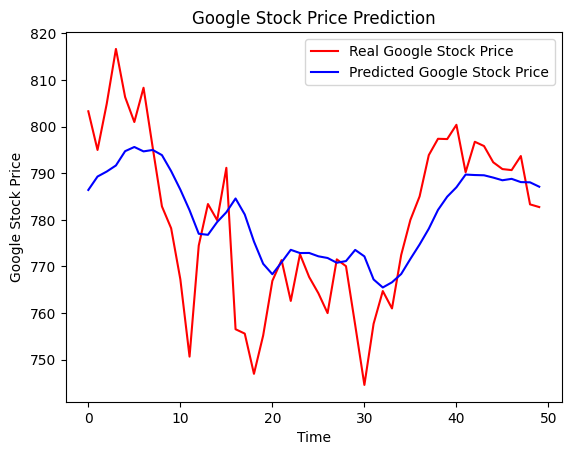

In [204]:
# visualising the results
plt.plot(test, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

In [212]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [214]:
trainX.shape

(1158, 1, 50)

In [206]:
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [207]:
model = Sequential()
model.add(LSTM(10, input_shape = (1, timesteps)))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.fit(trainX, Y_train, epochs = 50, batch_size = 1)

Epoch 1/50


C:\Users\jv028u\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1158/1158 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0422
Epoch 2/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0018
Epoch 3/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0017
Epoch 4/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0010  
Epoch 5/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0012
Epoch 6/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.9878e-04
Epoch 7/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0010
Epoch 8/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.6147e-04
Epoch 9/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.6840e-04
Epoch 10/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.5562e-04
Epoch 11/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.9122e-04
Epoch 12/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.1373e-04
Epoch 13/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.2043e-04
Epoch 14/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.3969e-04
Epoch 

In [215]:
# Prepare test dataset
testX = np.array(X_test)
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

# Predict with testX
predict_lstm = model.predict(testX)
predict_lstm = scaler.inverse_transform(predict_lstm)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


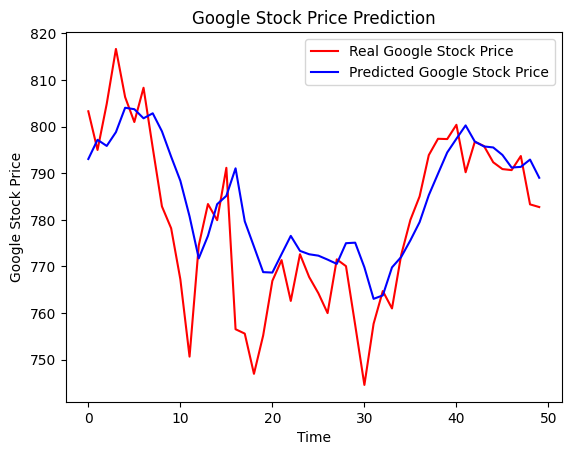

In [216]:
# visualising the results
plt.plot(test, color = "red", label = "Real Google Stock Price")
plt.plot(predict_lstm, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()